## PANDAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pandas import Series, DataFrame

Définir un objet Series comprenant la population de 5 pays puis afficher les pays ayant une population > 50’000’000.


In [3]:
ser_pays=Series([65,35,8,1200,300],index=["France","Espagne","Suisse","Chine"
                                         ,"USA"])

In [4]:
ser_pays

France       65
Espagne      35
Suisse        8
Chine      1200
USA         300
dtype: int64

In [5]:
#on sélectionne par position
ser_pays[1:4]

Espagne      35
Suisse        8
Chine      1200
dtype: int64

In [6]:
#on sélectionne par index
ser_pays[["France","Suisse"]]

France    65
Suisse     8
dtype: int64

In [7]:
#on applique des conditions simples
ser_grand_pays=ser_pays[ser_pays>50]

In [8]:
ser_grand_pays.values

array([  65, 1200,  300], dtype=int64)

In [9]:
#des conditions multiples
ser_pays[(ser_pays>50) | (ser_pays<30)]

France      65
Suisse       8
Chine     1200
USA        300
dtype: int64

Travail sur les dates

In [10]:
import datetime

In [11]:
dates=pd.date_range("2017-01-01",datetime.date.today(),freq="D")

In [12]:
dates

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-11-20', '2017-11-21', '2017-11-22', '2017-11-23',
               '2017-11-24', '2017-11-25', '2017-11-26', '2017-11-27',
               '2017-11-28', '2017-11-29'],
              dtype='datetime64[ns]', length=333, freq='D')

In [13]:
ser_bourse=Series(np.random.randn(len(dates)),index=dates)

In [14]:
ser_bourse.shape

(333,)

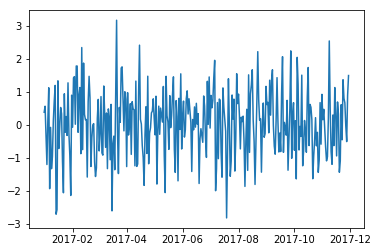

In [15]:
plt.plot(ser_bourse)

Récupérez les données de Wikipédia sur les résultats de NBA et obtenir les statistiques descriptives pour les variables quantitatives.
On utilisera plutôt Chrome ou Firefox pour ce type de tâches (éviter IE)


In [22]:
import webbrowser
url='https://en.wikipedia.org/wiki/List_of_all-time_NBA_win-loss_records'
webbrowser.open(url)

True

In [23]:
#puis
frame_nba=pd.read_clipboard()

In [24]:
frame_nba.head()

,Rank,Team,Won,Lost,Pct.,First NBA Season,Total Games,Division
0,1,San Antonio Spurs,"2,006","1,226",0.621,1976?77,"3,232",Southwest
1,2,Los Angeles Lakers,"3,235","2,134",0.603,1948?49,"5,369",Pacific
2,3,Boston Celtics,"3,221","2,257",0.588,1946?47,"5,478",Atlantic
3,4,Phoenix Suns,"2,122","1,766",0.546,1968?69,"3,888",Pacific
4,5,Oklahoma City Thunder,"2,139","1,831",0.539,1967?68,"3,97",Northwest


In [25]:
frame_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
Rank                30 non-null int64
Team                30 non-null object
Won                 30 non-null object
Lost                30 non-null object
Pct.                30 non-null float64
First NBA Season    30 non-null object
Total Games         30 non-null object
Division            30 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ KB


In [26]:
#affichage du nom des colonnes
frame_nba.columns

Index(['Rank', 'Team', 'Won', 'Lost', 'Pct.', 'First NBA Season',
       'Total Games', 'Division'],
      dtype='object')

In [27]:
#créer une variable
frame_nba["Won2"]=frame_nba["Won"].str.replace(",","")

Créer une procédure qui supprime les virgules dans les colonnes du dataframe

In [28]:
def nettoyage(frame):
    """Cette fonction permet de transformer les colonnes ayant des séparateurs de 
    milliers , en colonnes float"""
    for col in frame.columns:
        if frame[col].dtype==object:
            frame[col]=frame[col].str.replace(",","").astype(float, 
                                                             errors='ignore')

In [29]:
nettoyage(frame_nba)

In [30]:
#on fait un tri sur deux clés
frame_nba.sort_values(["Division","Won"],ascending=[True,False],inplace=True)

In [31]:
mes_sats=frame_nba.describe(include="all")

In [32]:
mes_sats.loc["mean"]

Rank                   15.5
Team                    NaN
Won                 1619.87
Lost                1843.83
Pct.                  0.494
First NBA Season        NaN
Total Games          3458.6
Division                NaN
Won2                1619.87
Name: mean, dtype: object

In [33]:
frame_nba.corr()

,Rank,Won,Lost,Pct.,Total Games,Won2
Rank,1.000000,-0.530043,-0.065044,-0.969359,-0.152724,-0.530043
Won,-0.530043,1.000000,0.460404,0.561834,0.438219,1.000000
Lost,-0.065044,0.460404,1.000000,0.074978,0.793153,0.460404
Pct.,-0.969359,0.561834,0.074978,1.000000,0.219929,0.561834
Total Games,-0.152724,0.438219,0.793153,0.219929,1.000000,0.438219
Won2,-0.530043,1.000000,0.460404,0.561834,0.438219,1.000000


### Import de fichier

In [34]:
#csv
frame_ventes=pd.read_csv("demo_ventes.csv",sep=";",decimal=",")

In [35]:
frame_ventes

,account,Jan,Feb,Mar
0,211829,10000,62000,35000
1,320563,95000,45000,35000
2,648336,91000,120000,35000
3,109996,45000,120000,10000
4,121213,162000,120000,35000
5,132971,150000,120000,35000
6,145068,62000,120000,70000
7,205217,145000,95000,35000
8,209744,70000,95000,35000
9,212303,70000,120000,35000


In [36]:
frame_airbnb=pd.read_csv("airbnb.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (43,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
frame_airbnb.shape

(56535, 95)

In [38]:
frame_airbnb.loc[0]

id                                                                            3508970
listing_url                                      https://www.airbnb.com/rooms/3508970
scrape_id                                                              20170404145355
last_scraped                                                               2017-04-06
name                                               Cosy Aptmt Bastille - Gare de Lyon
summary                             Cosy petit appartement de 60m2 situé aux pieds...
space                                                                             NaN
description                         Cosy petit appartement de 60m2 situé aux pieds...
experiences_offered                                                              none
neighborhood_overview               Marché d'Aligre, Coulée verte, Bastille, Squar...
notes                                                                             NaN
transit                             Métros à proximité

### Import fichier Excel

In [39]:
# méthode 1
frame_credit2=pd.read_excel("credit2.xlsx")

In [40]:
# méthode 2
credit2_excel=pd.ExcelFile("credit2.xlsx")

In [41]:
credit2_excel.sheet_names

['Sheet1']

In [42]:
frame_credit2bis=credit2_excel.parse(credit2_excel.sheet_names[0])

Récupérer des données d'une base SQL

In [43]:
from sqlalchemy import create_engine

In [44]:
engine=create_engine("sqlite:///salaries.sqlite")

In [45]:
engine.table_names()

['Salaries']

In [46]:
frame_salaries=pd.read_sql_query("SELECT * from Salaries",con=engine)

In [47]:
frame_salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


In [48]:
frame_salaries["TotalPay"].mean()

74768.321971703

In [49]:
frame_salaries["JobTitle"].value_counts()

Transit Operator                                      7036
Special Nurse                                         4389
Registered Nurse                                      3736
Public Svc Aide-Public Works                          2518
Police Officer 3                                      2421
Custodian                                             2418
TRANSIT OPERATOR                                      2388
Firefighter                                           2359
Recreation Leader                                     1971
Patient Care Assistant                                1945
Deputy Sheriff                                        1933
Police Officer                                        1476
SPECIAL NURSE                                         1402
Public Service Trainee                                1328
REGISTERED NURSE                                      1219
Police Officer 2                                      1141
Attorney (Civil/Criminal)                             11

Joindre les deux dataframes de credit en utilisant l’id.


In [50]:
frame_credit1=pd.read_table("credit1.txt")

In [51]:
frame_global=pd.merge(frame_credit1,frame_credit2,on="Customer_ID")

In [52]:
frame_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 31 columns):
Months_as_a_Customer               2000 non-null int64
Number_of_Products                 2000 non-null int64
RFM_Score                          2000 non-null int64
Average_Balance_Feed_Index         2000 non-null int64
Number_of_Transactions             2000 non-null int64
Personal_Debt_to_Equity_Ratio      2000 non-null int64
Months_Current_Account             2000 non-null int64
Number_of_Loan_Accounts            2000 non-null int64
Customer_ID                        2000 non-null int64
Has_Bad_Payment_Record             2000 non-null int64
Members_Within_Household           2000 non-null int64
Number_of_Call_Center_Contacts     2000 non-null int64
Weeks_Since_Last_Offer             2000 non-null int64
Accepted_Personal_Loan             2000 non-null object
Accepted_Retention                 2000 non-null object
Accepted_Home_Equity_Loan          2000 non-null object
Accepted_C

Discrétisation avec pandas

In [53]:
frame_salaries["pay_disc"]=pd.cut(frame_salaries["TotalPay"],5)

In [54]:
frame_salaries["pay_disc"].value_counts()

(-1186.344, 113024.582]     116422
(113024.582, 226667.294]     31558
(226667.294, 340310.006]       666
(340310.006, 453952.718]         5
(453952.718, 567595.43]          3
Name: pay_disc, dtype: int64

In [55]:
frame_salaries["pay_disc"]=pd.cut(frame_salaries["TotalPay"],[frame_salaries["TotalPay"].min()
                                                              ,10000,50000,
                                                             frame_salaries["TotalPay"].max()])

In [56]:
frame_salaries["pay_disc"].value_counts()

(50000.0, 567595.43]    102762
(10000.0, 50000.0]       27254
(-618.13, 10000.0]       18637
Name: pay_disc, dtype: int64

In [57]:
frame_salaries["pay_disc"]=pd.qcut(frame_salaries["TotalPay"],5)

In [58]:
frame_salaries["pay_disc"].value_counts()

(116203.934, 567595.43]    29731
(82593.838, 116203.934]    29731
(22559.132, 60703.398]     29731
(-618.131, 22559.132]      29731
(60703.398, 82593.838]     29730
Name: pay_disc, dtype: int64

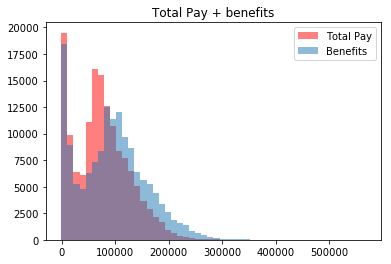

In [59]:
plt.hist(frame_salaries["TotalPay"],50,alpha=0.5,label="Total Pay",color="red")
plt.hist(frame_salaries["TotalPayBenefits"],50,alpha=0.5, label="Benefits")
plt.title("Total Pay + benefits")
plt.legend()

In [60]:
salaries_group=frame_salaries.groupby("JobTitle")

In [61]:
moy_salaries=salaries_group["TotalPay"].agg(["mean","std"])

In [62]:
moy_salaries.sort_values("mean",ascending=False)

,mean,std
JobTitle,,
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000,238131.155690
Chief Investment Officer,339653.700000,NaN
Chief of Police,329183.646667,9118.772821
"Chief, Fire Department",325971.683333,11083.523432
DEPUTY DIRECTOR OF INVESTMENTS,307899.460000,NaN
"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",302377.730000,NaN
"Gen Mgr, Public Trnsp Dept",297769.413333,6528.512299
Asst Chf of Dept (Fire Dept),281763.483889,30838.234104
"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",279359.560000,41086.598530


# DATAVIZ

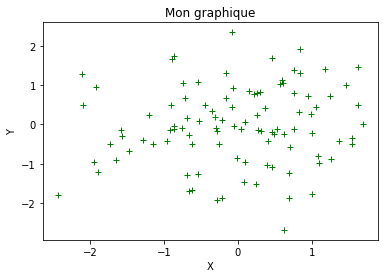

In [63]:
plt.plot(np.random.randn(100),np.random.randn(100),"g+")
plt.title("Mon graphique")
plt.xlabel("X")
plt.ylabel("Y")
#plt.show()

In [64]:
#on récupère les données iris
frame_iris=pd.read_excel("iris.xlsx")

In [65]:
frame_iris

,Long. Sepales,Larg. Sepales,Long. Petales,Larg. Petales,Espece
Iris1,50,33,14,2,Setosa
Iris2,64,28,56,22,Virginica
Iris3,65,28,46,15,Versicolor
Iris4,67,31,56,24,Virginica
Iris5,63,28,51,15,Virginica
Iris6,46,34,14,3,Setosa
Iris7,69,31,51,23,Virginica
Iris8,62,22,45,15,Versicolor
Iris9,59,32,48,18,Versicolor
Iris10,46,36,10,2,Setosa


{'boxes': [<matplotlib.lines.Line2D at 0x1630d93a400>],
 'caps': [<matplotlib.lines.Line2D at 0x1630d954dd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1630d968fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1630d968e48>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1630d93ad68>,
  <matplotlib.lines.Line2D at 0x1630d93af60>]}

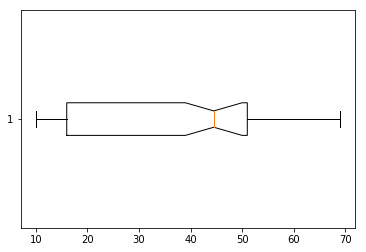

In [66]:
#le box plot avec matplotlib
plt.boxplot(frame_iris["Long. Petales"],notch=True,vert=False)

In [67]:
import seaborn as sns

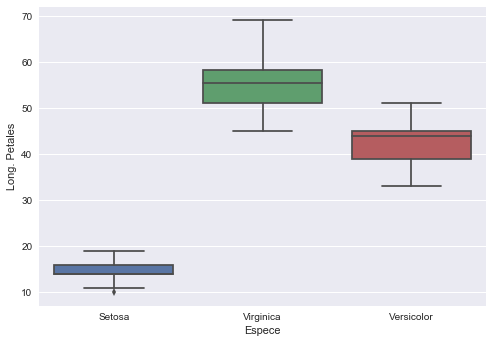

In [68]:
#le box plot avec seaborn
sns.boxplot("Espece","Long. Petales", data=frame_iris)
plt.savefig("mon_boxplot")

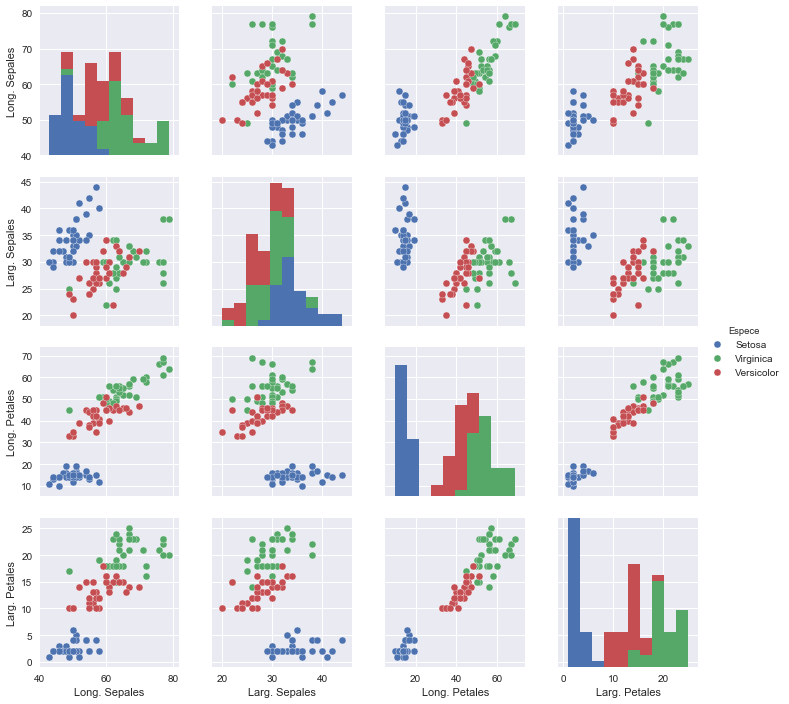

In [69]:
sns.pairplot(frame_iris,hue="Espece")

### Etude des données AirBnB

In [70]:
frame_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56535 entries, 0 to 56534
Data columns (total 95 columns):
id                                  56535 non-null int64
listing_url                         56535 non-null object
scrape_id                           56535 non-null int64
last_scraped                        56535 non-null object
name                                56532 non-null object
summary                             54371 non-null object
space                               39143 non-null object
description                         56528 non-null object
experiences_offered                 56535 non-null object
neighborhood_overview               33772 non-null object
notes                               18012 non-null object
transit                             36224 non-null object
access                              28756 non-null object
interaction                         27064 non-null object
house_rules                         30186 non-null object
thumbnail_url          

In [71]:
#transformation de la variable
frame_airbnb["price2"]=frame_airbnb["price"].str.replace("$","").str.replace(",","").astype(float)

In [72]:
frame_airbnb["price2"].mean()

96.11523834792607

In [73]:
frame_airbnb["price2"].min()

0.0

In [74]:
frame_airbnb["price2"].max()

7790.0

In [75]:
frame_airbnb.loc[8685]

id                                                                            9442661
listing_url                                      https://www.airbnb.com/rooms/9442661
scrape_id                                                              20170404145355
last_scraped                                                               2017-04-04
name                                                 Lively studette in 19th district
summary                             Located two steps away from the large merchant...
space                               When ever I can I'm traveling here and there a...
description                         Located two steps away from the large merchant...
experiences_offered                                                              none
neighborhood_overview                                                             NaN
notes                                                                             NaN
transit                             Close to the metro

In [76]:
frame_airbnb["price3"]=np.where(frame_airbnb["price2"]>300,300,frame_airbnb["price2"])

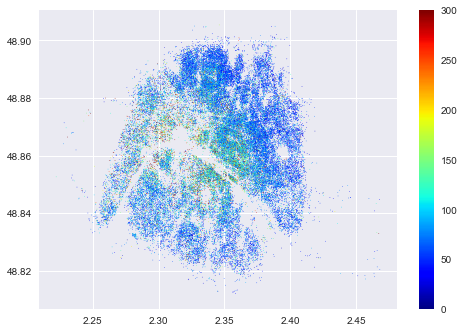

In [77]:
plt.scatter("longitude", "latitude", s=0.1, c="price3", data=frame_airbnb, cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.savefig("paris_airbnb")

Récupérer les données housing
Représenter les communes en fonction de la leur population
Les couleurs en fonction de l'income

In [78]:
frame_house=pd.read_csv("housing.csv")

In [79]:
import matplotlib.image as mpimg
calif_image=mpimg.imread("California.png")

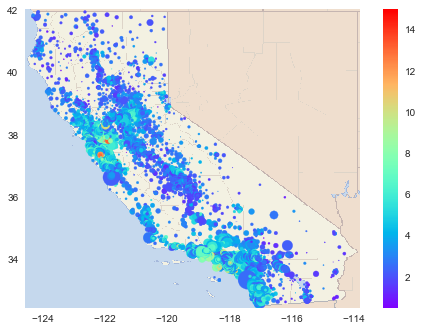

In [80]:
plt.scatter("longitude", "latitude",data=frame_house, s=frame_house["population"]/100,
           c="median_income",cmap=plt.get_cmap("rainbow"))
plt.grid(False)
plt.colorbar()
plt.imshow(calif_image, alpha=0.5,extent=[-124.55, -113.80, 32.45, 42.05])
